In [1]:
from torch.utils.data import Dataset, DataLoader
import cv2
import numpy as np
import utilities_original
import cv2
import os
import matplotlib.pyplot as plt


In [2]:
def show_image(img, figsize=(10,10), gray=True):
    plt.figure(figsize=figsize)
    plt.imshow(img, 'gray' if gray else None)
    plt.axis('off')

In [3]:
class CustomDataset(Dataset):
  def __init__(self, data: np.ndarray, feature_extractor):
    super(CustomDataset, self).__init__()

    
    self.data = data
    self.feature_extractor = feature_extractor

  def __len__(self):
    return len(self.data)
  

  def __getitem__(self, idx):
    image = self.data[idx][:, :256, :][:, :, [2, 1, 0]]
    mask = self.data[idx][:, 256:, :][:, :, [2, 1, 0]]
    mask = utilities_original.encoded_mask(mask)

    encoded_input = self.feature_extractor(image, mask, return_tensors="pt")
    for k, v in encoded_input.items():
      encoded_input[k].squeeze_()

    return encoded_input

In [4]:
p_image = r"D:\segformer\Unstained"
images = os.listdir(p_image)
images

['HC23-00605-A1-1.[0x0].jpg',
 'HC23-00605-A1-1.[0x2048].jpg',
 'HC23-00605-A1-1.[0x3072].jpg',
 'HC23-00605-A1-1.[10240x0].jpg',
 'HC23-00605-A1-1.[10240x1024].jpg',
 'HC23-00605-A1-1.[10240x2048].jpg',
 'HC23-00605-A1-1.[10240x3072].jpg',
 'HC23-00605-A1-1.[1024x1024].jpg',
 'HC23-00605-A1-1.[1024x2048].jpg',
 'HC23-00605-A1-1.[11264x1024].jpg',
 'HC23-00605-A1-1.[11264x2048].jpg',
 'HC23-00605-A1-1.[11264x3072].jpg',
 'HC23-00605-A1-1.[12288x2048].jpg',
 'HC23-00605-A1-1.[12288x3072].jpg',
 'HC23-00605-A1-1.[2048x0].jpg',
 'HC23-00605-A1-1.[2048x1024].jpg',
 'HC23-00605-A1-1.[2048x2048].jpg',
 'HC23-00605-A1-1.[3072x0].jpg',
 'HC23-00605-A1-1.[3072x1024].jpg',
 'HC23-00605-A1-1.[3072x2048].jpg',
 'HC23-00605-A1-1.[4096x0].jpg',
 'HC23-00605-A1-1.[4096x1024].jpg',
 'HC23-00605-A1-1.[4096x2048].jpg',
 'HC23-00605-A1-1.[5120x0].jpg',
 'HC23-00605-A1-1.[5120x1024].jpg',
 'HC23-00605-A1-1.[5120x2048].jpg',
 'HC23-00605-A1-1.[5120x3072].jpg',
 'HC23-00605-A1-1.[6144x0].jpg',
 'HC23-00605-

In [5]:
p_mask = r"D:\segformer\Masks"
masks = os.listdir(p_mask)
masks

['HC23-00605-A1-1.[0x0].png',
 'HC23-00605-A1-1.[0x2048].png',
 'HC23-00605-A1-1.[0x3072].png',
 'HC23-00605-A1-1.[10240x0].png',
 'HC23-00605-A1-1.[10240x1024].png',
 'HC23-00605-A1-1.[10240x2048].png',
 'HC23-00605-A1-1.[10240x3072].png',
 'HC23-00605-A1-1.[1024x1024].png',
 'HC23-00605-A1-1.[1024x2048].png',
 'HC23-00605-A1-1.[11264x1024].png',
 'HC23-00605-A1-1.[11264x2048].png',
 'HC23-00605-A1-1.[11264x3072].png',
 'HC23-00605-A1-1.[12288x2048].png',
 'HC23-00605-A1-1.[12288x3072].png',
 'HC23-00605-A1-1.[2048x0].png',
 'HC23-00605-A1-1.[2048x1024].png',
 'HC23-00605-A1-1.[2048x2048].png',
 'HC23-00605-A1-1.[3072x0].png',
 'HC23-00605-A1-1.[3072x1024].png',
 'HC23-00605-A1-1.[3072x2048].png',
 'HC23-00605-A1-1.[4096x0].png',
 'HC23-00605-A1-1.[4096x1024].png',
 'HC23-00605-A1-1.[4096x2048].png',
 'HC23-00605-A1-1.[5120x0].png',
 'HC23-00605-A1-1.[5120x1024].png',
 'HC23-00605-A1-1.[5120x2048].png',
 'HC23-00605-A1-1.[5120x3072].png',
 'HC23-00605-A1-1.[6144x0].png',
 'HC23-00605-

In [6]:
images = [cv2.imread(os.path.join(p_image, image)) for image in images]

In [7]:
images = np.array(images) 
images.shape

(1620, 256, 256, 3)

In [8]:
masks = [cv2.imread(os.path.join(p_mask, mask)) for mask in masks]

In [9]:
masks = np.array(masks)
masks.shape

(1620, 256, 256, 3)

In [13]:
preprocessed_data = []
for i in range (len(images)):
    concatenated = np.concatenate((images[i], masks[i]), axis=1)
    preprocessed_data.append(concatenated)

In [14]:
preprocessed_data = np.array(preprocessed_data)

In [12]:
# np.save('C:/University/FYP/X_base_train.npy', images)
# np.save('C:/University/FYP/Y_base_train.npy', masks)
np.save('preprocessed_data_unstained.npy', preprocessed_data)

In [15]:
#move directly to load npy data file
preprocessed_data = np.load('preprocessed_data_unstained.npy')

In [16]:
preprocessed_data.shape

(1620, 256, 512, 3)

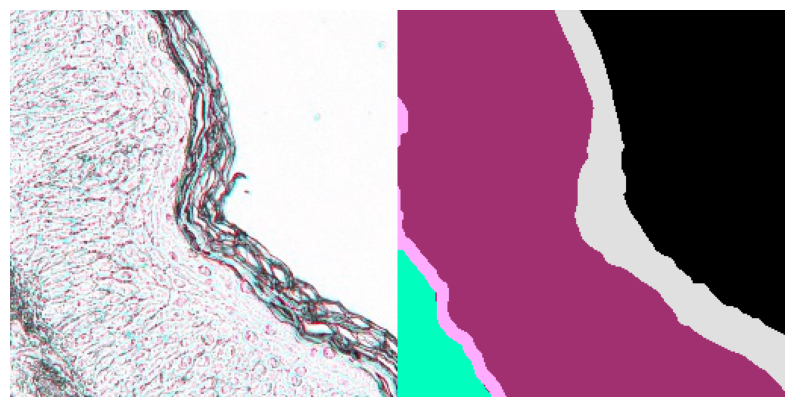

In [17]:
show_image(preprocessed_data[222])



In [18]:
from transformers import SegformerFeatureExtractor

feature_extractor = SegformerFeatureExtractor()

train_data = CustomDataset(preprocessed_data[:1500, :, :, :], feature_extractor)
val_data = CustomDataset(preprocessed_data[1500:, :, :, :], feature_extractor)


c:\Users\Zeesh.Asaf.uaf\Anaconda3\envs\segformer\Lib\site-packages\transformers\models\segformer\feature_extraction_segformer.py:28: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  warnings.warn(


In [19]:
id2label = {0: "A",
            1: "B",
            2: "C",
            3: "D",
            4: "E",}

label2id = {v: k for k, v in id2label.items()}

In [20]:
encoded_inputs = train_data[899]
encoded_inputs['pixel_values'].shape, encoded_inputs['labels'].shape

(torch.Size([3, 512, 512]), torch.Size([512, 512]))

In [21]:
encoded_inputs["labels"].squeeze().unique()

tensor([0, 1, 2, 3, 4])

In [22]:
train_dataset = DataLoader(train_data, batch_size=20, shuffle=True)
val_dataset = DataLoader(val_data, batch_size=1)

In [23]:
for k, v in next(iter(train_dataset)).items():
  print(k, v.shape)

pixel_values torch.Size([20, 3, 512, 512])
labels torch.Size([20, 512, 512])


In [24]:
from transformers import SegformerForSemanticSegmentation
import json
from huggingface_hub import cached_download, hf_hub_url

model = SegformerForSemanticSegmentation.from_pretrained("nvidia/mit-b0",
                                                         num_labels=5,
                                                         id2label=id2label,
                                                         label2id=label2id)

Some weights of SegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/mit-b0 and are newly initialized: ['decode_head.batch_norm.bias', 'decode_head.batch_norm.weight', 'decode_head.linear_c.3.proj.weight', 'decode_head.linear_c.0.proj.bias', 'decode_head.linear_c.2.proj.weight', 'decode_head.classifier.weight', 'decode_head.batch_norm.num_batches_tracked', 'decode_head.linear_c.1.proj.weight', 'decode_head.batch_norm.running_var', 'decode_head.linear_c.3.proj.bias', 'decode_head.linear_c.0.proj.weight', 'decode_head.linear_c.2.proj.bias', 'decode_head.linear_c.1.proj.bias', 'decode_head.linear_fuse.weight', 'decode_head.classifier.bias', 'decode_head.batch_norm.running_mean']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
from datasets import load_metric
metric = load_metric('mean_iou')

C:\Users\Zeesh.Asaf.uaf\AppData\Local\Temp\ipykernel_19504\1244093886.py:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric('mean_iou')


In [26]:
import torch
import torch.optim as optim
import torch.nn as nn
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.00006)
model.to(device)

In [28]:
scaler = torch.cuda.amp.GradScaler()

In [29]:
start_epoch = 0

In [ ]:
epoch = 5 # which checkpoint_to_load
checkpoint = torch.load('checkpoint_'+str(epoch)+'.pth')
model.load_state_dict(checkpoint['model_state_dict'])
start_epoch = checkpoint['epoch']
loss = checkpoint['loss']


In [31]:
model.train()
for epoch in range(start_epoch, 20):
  print(f"--> Epoch: {epoch}")
  for idx, batch in enumerate(tqdm(train_dataset)):
    pixel_values = batch['pixel_values'].to(device)
    labels = batch['labels'].to(device)

    with torch.cuda.amp.autocast():
      output = model(pixel_values=pixel_values, labels=labels)
      loss, logits = output.loss, output.logits

    optimizer.zero_grad()
    scaler.scale(loss).backward()
    scaler.step(optimizer)
    scaler.update()

    with torch.no_grad():
      rescaled_logits = nn.functional.interpolate(
          logits.detach().cpu().float(),
          size=labels.shape[-2:],
          mode="bilinear",
          align_corners=False
      ) 
      predicted = rescaled_logits.argmax(1)

      # metric
      metric.add_batch(predictions=predicted.detach().cpu().numpy(), references=labels.detach().cpu().numpy())

    if idx % 10 == 0:
      metrics = metric._compute(predictions=predicted.detach().cpu().numpy(),
                                references=labels.detach().cpu().numpy(),
                                num_labels=len(id2label),
                                ignore_index=255)
      
      print(f"idx: {idx}", f"\t Loss: {loss.item()}","\t Mean_iou:", metrics["mean_iou"],"\t Mean accuracy:", metrics["mean_accuracy"])
  print("Saving checkpoint...")

  torch.save({
  'epoch': epoch,
  'model_state_dict': model.state_dict(),
  'loss': loss,
  }, 'checkpoint_'+str(epoch)+'.pth')

  print("Checkpoint saved!")

--> Epoch: 0


  0%|          | 0/75 [00:00<?, ?it/s]

idx: 0 	 Loss: 1.5516928434371948 	 Mean_iou: 0.12542816829941128 	 Mean accuracy: 0.20567029397868822
idx: 10 	 Loss: 0.8836343884468079 	 Mean_iou: 0.5459808896615738 	 Mean accuracy: 0.6237821838838482
idx: 20 	 Loss: 0.702202320098877 	 Mean_iou: 0.5228213090123925 	 Mean accuracy: 0.633453066981957
idx: 30 	 Loss: 0.638393223285675 	 Mean_iou: 0.5550393311935674 	 Mean accuracy: 0.6760108255713798
idx: 40 	 Loss: 0.5751469731330872 	 Mean_iou: 0.5261854367292557 	 Mean accuracy: 0.6344671892607673
idx: 50 	 Loss: 0.50058913230896 	 Mean_iou: 0.55024622641333 	 Mean accuracy: 0.6682839022420806
idx: 60 	 Loss: 0.47330570220947266 	 Mean_iou: 0.5957952972033569 	 Mean accuracy: 0.6881795798363602
idx: 70 	 Loss: 0.42581233382225037 	 Mean_iou: 0.6155489424678098 	 Mean accuracy: 0.6975801207563895
Saving checkpoint...
Checkpoint saved!
--> Epoch: 1


  0%|          | 0/75 [00:00<?, ?it/s]

idx: 0 	 Loss: 0.41310596466064453 	 Mean_iou: 0.6355004046331947 	 Mean accuracy: 0.7197004771475674
idx: 10 	 Loss: 0.3429548442363739 	 Mean_iou: 0.6466439363449876 	 Mean accuracy: 0.7465740810692887
idx: 20 	 Loss: 0.40237706899642944 	 Mean_iou: 0.6073862085434825 	 Mean accuracy: 0.7082443386689082
idx: 30 	 Loss: 0.4348309636116028 	 Mean_iou: 0.6561747403409197 	 Mean accuracy: 0.7560553956894125
idx: 40 	 Loss: 0.3091566264629364 	 Mean_iou: 0.6319221109545052 	 Mean accuracy: 0.7443519227767502
idx: 50 	 Loss: 0.3759646415710449 	 Mean_iou: 0.6355223269460389 	 Mean accuracy: 0.7373478924950906
idx: 60 	 Loss: 0.30202537775039673 	 Mean_iou: 0.6415476045797346 	 Mean accuracy: 0.727044901996057
idx: 70 	 Loss: 0.2929147779941559 	 Mean_iou: 0.6204790783135362 	 Mean accuracy: 0.7222348294525606
Saving checkpoint...
Checkpoint saved!
--> Epoch: 2


  0%|          | 0/75 [00:00<?, ?it/s]

idx: 0 	 Loss: 0.26300567388534546 	 Mean_iou: 0.6420851580289111 	 Mean accuracy: 0.7124759013111636
idx: 10 	 Loss: 0.2683447003364563 	 Mean_iou: 0.6342539741284063 	 Mean accuracy: 0.709322515236352
idx: 20 	 Loss: 0.2637762129306793 	 Mean_iou: 0.6624425250465318 	 Mean accuracy: 0.7501788596757014
idx: 30 	 Loss: 0.3207673132419586 	 Mean_iou: 0.6321749455371657 	 Mean accuracy: 0.7068007499412897
idx: 40 	 Loss: 0.31800875067710876 	 Mean_iou: 0.622707383655165 	 Mean accuracy: 0.7505024093033803
idx: 50 	 Loss: 0.23395459353923798 	 Mean_iou: 0.6919251265742548 	 Mean accuracy: 0.7571285603871544
idx: 60 	 Loss: 0.2548791766166687 	 Mean_iou: 0.6225351113316551 	 Mean accuracy: 0.6958747456025247
idx: 70 	 Loss: 0.2698081135749817 	 Mean_iou: 0.6775233296614664 	 Mean accuracy: 0.7429701135146489
Saving checkpoint...
Checkpoint saved!
--> Epoch: 3


  0%|          | 0/75 [00:00<?, ?it/s]

idx: 0 	 Loss: 0.40132540464401245 	 Mean_iou: 0.5888658827025635 	 Mean accuracy: 0.6932946846035071
idx: 10 	 Loss: 0.22460810840129852 	 Mean_iou: 0.6595536885805343 	 Mean accuracy: 0.7222166277431142
idx: 20 	 Loss: 0.27844852209091187 	 Mean_iou: 0.660794889113523 	 Mean accuracy: 0.7537416922426842
idx: 30 	 Loss: 0.2366800308227539 	 Mean_iou: 0.6553669936201321 	 Mean accuracy: 0.731059934293631
idx: 40 	 Loss: 0.28161489963531494 	 Mean_iou: 0.6628259347608014 	 Mean accuracy: 0.7312366994394901
idx: 50 	 Loss: 0.22194166481494904 	 Mean_iou: 0.6162128872006687 	 Mean accuracy: 0.7290737346150433
idx: 60 	 Loss: 0.22296831011772156 	 Mean_iou: 0.6969356009893056 	 Mean accuracy: 0.7771163600748905
idx: 70 	 Loss: 0.22931230068206787 	 Mean_iou: 0.6685464838240824 	 Mean accuracy: 0.7510822934865127
Saving checkpoint...
Checkpoint saved!
--> Epoch: 4


  0%|          | 0/75 [00:00<?, ?it/s]

idx: 0 	 Loss: 0.22190001606941223 	 Mean_iou: 0.664228899162137 	 Mean accuracy: 0.7434624515823858
idx: 10 	 Loss: 0.32908332347869873 	 Mean_iou: 0.5742348774966034 	 Mean accuracy: 0.6706136005480225
idx: 20 	 Loss: 0.1941571682691574 	 Mean_iou: 0.6953767315311394 	 Mean accuracy: 0.7687133697374933
idx: 30 	 Loss: 0.28266534209251404 	 Mean_iou: 0.6373905618985516 	 Mean accuracy: 0.7229693917291046
idx: 40 	 Loss: 0.23555073142051697 	 Mean_iou: 0.6873838289850667 	 Mean accuracy: 0.7514601244107283
idx: 50 	 Loss: 0.24234871566295624 	 Mean_iou: 0.6499467543704076 	 Mean accuracy: 0.737955809915219
idx: 60 	 Loss: 0.18754805624485016 	 Mean_iou: 0.7186146121908144 	 Mean accuracy: 0.7926342606505805
idx: 70 	 Loss: 0.24005655944347382 	 Mean_iou: 0.6902336368345312 	 Mean accuracy: 0.7703643209601181
Saving checkpoint...
Checkpoint saved!
--> Epoch: 5


  0%|          | 0/75 [00:00<?, ?it/s]

idx: 0 	 Loss: 0.24404475092887878 	 Mean_iou: 0.6819991309414621 	 Mean accuracy: 0.7427005332916228
idx: 10 	 Loss: 0.2060789167881012 	 Mean_iou: 0.625190422404802 	 Mean accuracy: 0.7430711073767242
idx: 20 	 Loss: 0.20412011444568634 	 Mean_iou: 0.6990687764027844 	 Mean accuracy: 0.7877446079881604
idx: 30 	 Loss: 0.18695330619812012 	 Mean_iou: 0.7203860192839073 	 Mean accuracy: 0.7877807111653563
idx: 40 	 Loss: 0.27787473797798157 	 Mean_iou: 0.6450839107480758 	 Mean accuracy: 0.7688875789949035
idx: 50 	 Loss: 0.203538179397583 	 Mean_iou: 0.7133352124404865 	 Mean accuracy: 0.7900720588139394
idx: 60 	 Loss: 0.1992015838623047 	 Mean_iou: 0.7148931748346656 	 Mean accuracy: 0.785799118284299
idx: 70 	 Loss: 0.23381011188030243 	 Mean_iou: 0.679832874041549 	 Mean accuracy: 0.7780236823214753
Saving checkpoint...
Checkpoint saved!
--> Epoch: 6


  0%|          | 0/75 [00:00<?, ?it/s]

idx: 0 	 Loss: 0.25012725591659546 	 Mean_iou: 0.6870796108619283 	 Mean accuracy: 0.7787222382890974
idx: 10 	 Loss: 0.17976412177085876 	 Mean_iou: 0.719285352281282 	 Mean accuracy: 0.8070240844932067
idx: 20 	 Loss: 0.1715516448020935 	 Mean_iou: 0.6895882497723761 	 Mean accuracy: 0.7851989963363406
idx: 30 	 Loss: 0.18228529393672943 	 Mean_iou: 0.7055642880220893 	 Mean accuracy: 0.7846927907530892
idx: 40 	 Loss: 0.16140997409820557 	 Mean_iou: 0.7236291505727532 	 Mean accuracy: 0.7942610761171416
idx: 50 	 Loss: 0.15028588473796844 	 Mean_iou: 0.6971001646121673 	 Mean accuracy: 0.7946677855059636
idx: 60 	 Loss: 0.3121992349624634 	 Mean_iou: 0.6674719818539339 	 Mean accuracy: 0.7543260535362835
idx: 70 	 Loss: 0.14464063942432404 	 Mean_iou: 0.7329800476191337 	 Mean accuracy: 0.8223078930940732
Saving checkpoint...
Checkpoint saved!
--> Epoch: 7


  0%|          | 0/75 [00:00<?, ?it/s]

idx: 0 	 Loss: 0.18214082717895508 	 Mean_iou: 0.708956579103145 	 Mean accuracy: 0.7824800073320511
idx: 10 	 Loss: 0.14949271082878113 	 Mean_iou: 0.7466726888176194 	 Mean accuracy: 0.8276470492221465
idx: 20 	 Loss: 0.21767905354499817 	 Mean_iou: 0.7483348385519928 	 Mean accuracy: 0.8248818502558608
idx: 30 	 Loss: 0.18467460572719574 	 Mean_iou: 0.739259685332385 	 Mean accuracy: 0.8161069114666848
idx: 40 	 Loss: 0.15553246438503265 	 Mean_iou: 0.7508493440984751 	 Mean accuracy: 0.8264856592427122
idx: 50 	 Loss: 0.16271910071372986 	 Mean_iou: 0.7448586819007894 	 Mean accuracy: 0.8266361496534076
idx: 60 	 Loss: 0.15587429702281952 	 Mean_iou: 0.7336282669922649 	 Mean accuracy: 0.8166672139995695
idx: 70 	 Loss: 0.1545029878616333 	 Mean_iou: 0.7376727108584615 	 Mean accuracy: 0.8252596807584425
Saving checkpoint...
Checkpoint saved!
--> Epoch: 8


  0%|          | 0/75 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
index = 164 #image_index
print(len(preprocessed_data))
import matplotlib.pyplot as plt
image, segmentation_mask = preprocessed_data[index][:, :256, :][:, :, [2, 1, 0]], preprocessed_data[index][:, 256:, :][:, :, [2, 1, 0]]
image.shape, segmentation_mask.shape
encodings = feature_extractor(image, return_tensors="pt")
pixel_values = encodings.pixel_values.to(device)
pixel_values.shape

In [ ]:
with torch.no_grad():
  output = model(pixel_values=pixel_values)
  rescaled_logits = nn.functional.interpolate(
      output.logits.detach().cpu().float(),
      size=segmentation_mask.shape[:2],
      mode="bilinear",
      align_corners=False
  )
  predicted = rescaled_logits.argmax(1).squeeze().detach().cpu().numpy()

print("This worked well!")


In [ ]:
# show alll three images together
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.axis('off')
plt.title("Original Image")
plt.subplot(1, 3, 2)
plt.imshow(segmentation_mask)
plt.axis('off')
plt.title("Ground Truth")
plt.subplot(1, 3, 3)
plt.imshow(utilities_original.decoded_mask(predicted))
plt.axis('off')
plt.title("Predicted Mask")
plt.show()


testing on 12 images


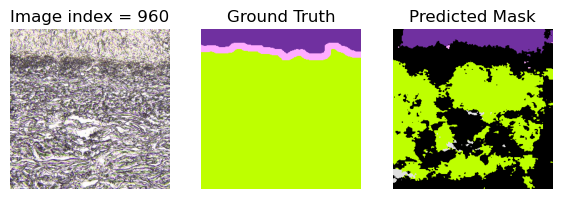

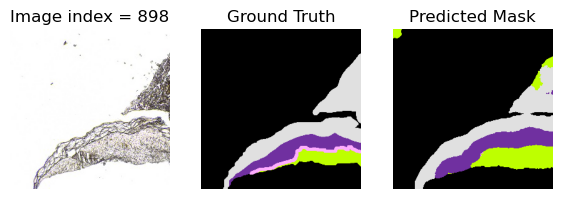

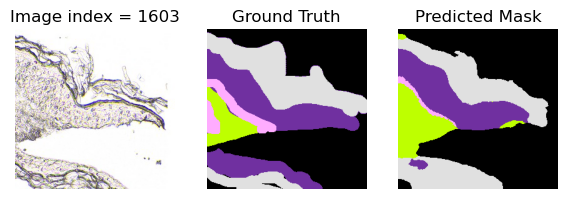

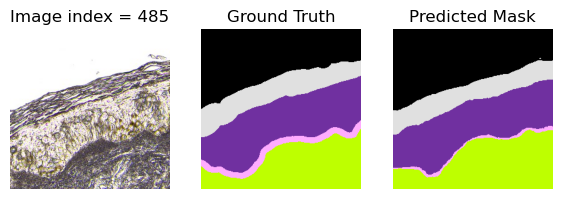

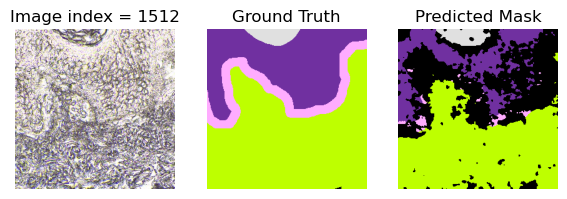

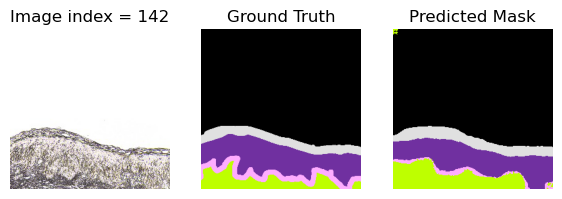

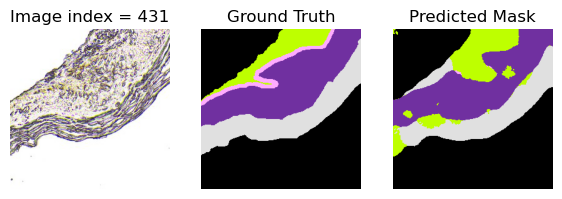

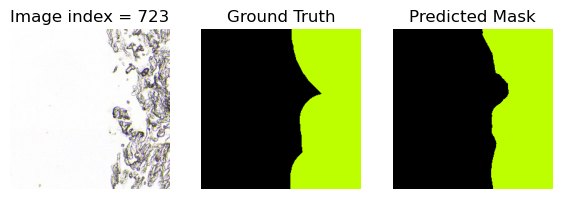

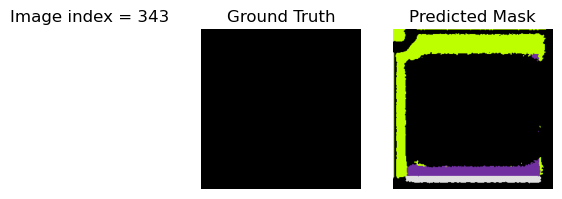

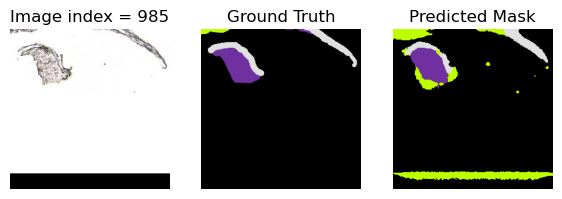

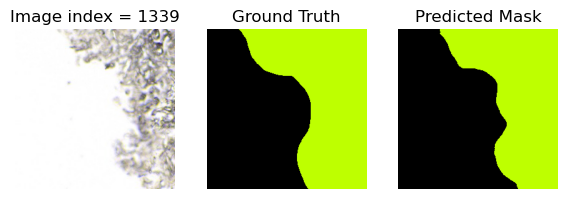

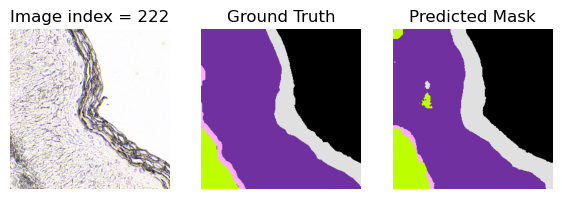

In [32]:
# randomly test n images
no_of_images = 12
import random
indexes = random.sample(range(0, len(preprocessed_data)), no_of_images)
# each value only once
indexes = list(set(indexes))
print("testing on", len(indexes), "images")
import matplotlib.pyplot as plt
for index in indexes:
    image, segmentation_mask = preprocessed_data[index][:, :256, :][:, :, [2, 1, 0]], preprocessed_data[index][:, 256:, :][:, :, [2, 1, 0]]
    image.shape, segmentation_mask.shape
    encodings = feature_extractor(image, return_tensors="pt")
    pixel_values = encodings.pixel_values.to(device)
    pixel_values.shape

    with torch.no_grad():
      output = model(pixel_values=pixel_values)
      rescaled_logits = nn.functional.interpolate(
          output.logits.detach().cpu().float(),
          size=segmentation_mask.shape[:2],
          mode="bilinear",
          align_corners=False
      )
      predicted = rescaled_logits.argmax(1).squeeze().detach().cpu().numpy()

    # show all three images together
    plt.figure(figsize=(7, 7))
    
    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title("Image index = " + str(index) )
    plt.subplot(1, 3, 2)
    plt.imshow(segmentation_mask)
    plt.axis('off')
    plt.title("Ground Truth")
    plt.subplot(1, 3, 3)
    plt.imshow(utilities_original.decoded_mask(predicted))
    plt.axis('off')
    plt.title("Predicted Mask")
    plt.show()


In [ ]:
# logits = output.logits.cpu()
# logits.shape
# # Rescaling the Logits to the original size
# rescaled_logit = nn.functional.interpolate(
#     logits,
#     size=image[:, :, -1].shape,
#     mode='bilinear',
#     align_corners=False
# )
# size=image[:, :, -1].shape
# print(size )

# seg_msk = rescaled_logit.argmax(1)[0]
# color_seg = utilities_original.decoded_mask(seg_msk)

In [ ]:
#plt.imshow(color_seg)

In [ ]:
#plt.imshow(segmentation_mask)

In [ ]:
# img = image *0.5 + segmentation_mask * 0.5
# img = img.astype(np.uint8)
# plt.imshow(img)